# Michael NANA KAMENI

# [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
- `ScheduledDay` tells us on
what day the patient set up their
appointment.
- `Neighborhood` indicates the
location of the hospital.
- `Scholarship` indicates
whether or not the patient is
enrolled in Brasilian welfare
program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000).
- Be careful about the encoding
of the last column: it says `No` if
the patient showed up to their
appointment, and `Yes` if they
did not show up.

## Importer les librairies utiles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Load data to a dataframe
lien = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"
data = pd.read_csv(lien, sep= ',')

# Copy data to a different dataframe
cp = data.copy()
cp.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63063,8.375452e+12,5705040,F,2016-05-16T17:35:00Z,2016-05-18T00:00:00Z,66,JARDIM CAMBURI,0,0,0,0,0,0,No
85922,9.949264e+12,5568187,F,2016-04-11T14:04:42Z,2016-06-07T00:00:00Z,6,JARDIM CAMBURI,0,0,0,0,0,1,Yes
35093,6.994267e+11,5743986,M,2016-05-30T09:40:32Z,2016-05-31T00:00:00Z,0,BOA VISTA,0,0,0,0,0,0,No
105434,5.198893e+13,5772273,M,2016-06-03T15:01:58Z,2016-06-03T00:00:00Z,0,GOIABEIRAS,0,0,0,0,0,0,No
100131,3.843583e+12,5747818,F,2016-05-30T16:22:57Z,2016-06-02T00:00:00Z,61,MARIA ORTIZ,0,0,0,0,0,0,No


In [ ]:
# Learn the size of the dataset
cp.shape

(110527, 14)

Ce tableau de donnees contient **110527 lignes** et **14 colonnes**

In [ ]:
# Determinons ces colonnes:
cp.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
#Verifions le type des attributs:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Interpretation:
1. Il n'existe pas de donnees manquantes dans le dataframe(le tableau de valeurs).
2. La colonne `PatientId` a des valeurs de type réelles et devraient etre convertir en valeurs entières.
3. Les colonnees `ScheduledDay` et `AppointmentDay` sont des types chaines de caracteres et devraient etre convertir respectivement en datetime et en date.
4. La colonne `No-show` a des valeurs de types chaines de caracteres que nous pouvons convertir en booleen entier.
5. Il existe 13 variables independantes et une variable dependante.


In [ ]:
# Convertir la date au type datetime
cp['ScheduledDay'] = pd.to_datetime(cp['ScheduledDay'])
cp['ScheduledDay'].sample(5)

52464    2016-05-17 06:59:38+00:00
81719    2016-04-15 12:10:04+00:00
100657   2016-04-26 10:09:23+00:00
88185    2016-05-24 07:05:30+00:00
93238    2016-06-03 11:44:02+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [ ]:
# Convertir la date au type date
cp['AppointmentDay'] = pd.to_datetime(cp['AppointmentDay']).dt.date.astype('datetime64[ns]')
cp['AppointmentDay'].sample(5)

86251   2016-06-03
70193   2016-05-11
58742   2016-05-10
12540   2016-05-06
86938   2016-06-01
Name: AppointmentDay, dtype: datetime64[ns]

In [ ]:
# Convertir la colonne "PatientId" en entier:
cp['PatientId']= cp['PatientId'].astype(int)

In [ ]:
# Visualisons un extrait aleatoire:
cp['No-show'].sample(20)

89930      No
103018     No
95830      No
101155     No
23922      No
89634      No
75024      No
99591      No
49964      No
11360      No
16032     Yes
16515      No
87976     Yes
37160      No
94820      No
33234      No
42110      No
19341     Yes
101046     No
70830      No
Name: No-show, dtype: object

In [ ]:
# Confirmons le nombre de cellule avec des donnees manquantes par colonne:
cp.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# Vérifions s'il y a des PatientId dupliqués: 
cp_duplicate = cp[cp['PatientId'].duplicated()==True]
cp_duplicate

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,12154843752835,5628345,F,2016-04-27 10:51:45+00:00,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,No
154,19252634865,5636933,F,2016-04-28 16:38:34+00:00,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,No
288,22462135793684,5532908,M,2016-03-31 12:39:06+00:00,2016-04-29,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7222383233748,5566070,M,2016-04-11 09:50:18+00:00,2016-04-29,7,CARATOÍRA,0,0,0,0,0,1,No
316,17565785761493,5582867,F,2016-04-14 10:01:09+00:00,2016-04-29,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,36355337746436,5651072,F,2016-05-03 08:23:40+00:00,2016-06-07,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


# Interpretation:
Il y a des patient qui ont demande plusieurs rendez-vous.  

In [ ]:
#Retrouvons le nombre de patients ayant eu plusieurs rendez-vous:
len(list(cp_duplicate['PatientId'].unique()))

24379

Cela nous montre qu'il y a eu 24379 patient ayant plusieurs rendez-vous.

In [ ]:
# Verifions les types de donnees:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns]     
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [ ]:
#Observation des donnees agregees
cp1 = cp[['PatientId', 'AppointmentID','ScheduledDay', 'Gender', 'AppointmentDay','Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes',	'Alcoholism',	'Handcap',	'SMS_received',	'No-show']]
cp1.describe(include='all')

,PatientId,AppointmentID,ScheduledDay,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,103549,2,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,2016-05-06 07:09:54+00:00,F,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,24,71840,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,NaN,2015-11-10 07:13:56+00:00,NaN,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 20:07:23+00:00,NaN,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921700e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


# Interpretation:
- Les rendez-vous sont pris entre la date du **29 Avril 2016**  au **08 Juin 2016**. La date de rendez-vous la plus frequente est le **06 Juin 2016** qui apparait **4692** fois.	 
- Les dates de reservations sont comprises entre le **10 Novembre 2015** et **08 Juin 2016**. La date de reservations la plus frequente est le **06 Mai 2016** qui apparait **24** fois.
- Le quartier dans lequel il y a plus de rendez-vous pour consultation est **JARDIM CAMBURI** avec **7717** occurences.
- L'**age moyen** des patients est **37 ans**. **25%** des patients ont moins de **18 ans** avec le patient le plus jeunes a**-1 an** ce qui n'est pas possible car un homme ne peut avoir un age negatif. Le plus viens a **115 ans**.
- Un patient est soit un handicapé, soit il ne l'est pas. Donc la colonnes des handicapes est une colonne categorielle de deux classes **0** ou **1**. Donc, le maximum **4** ici represente une **valeur aberrante.**

In [ ]:
cp3 = cp1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb646a4fdd0>,
      dtype=object)

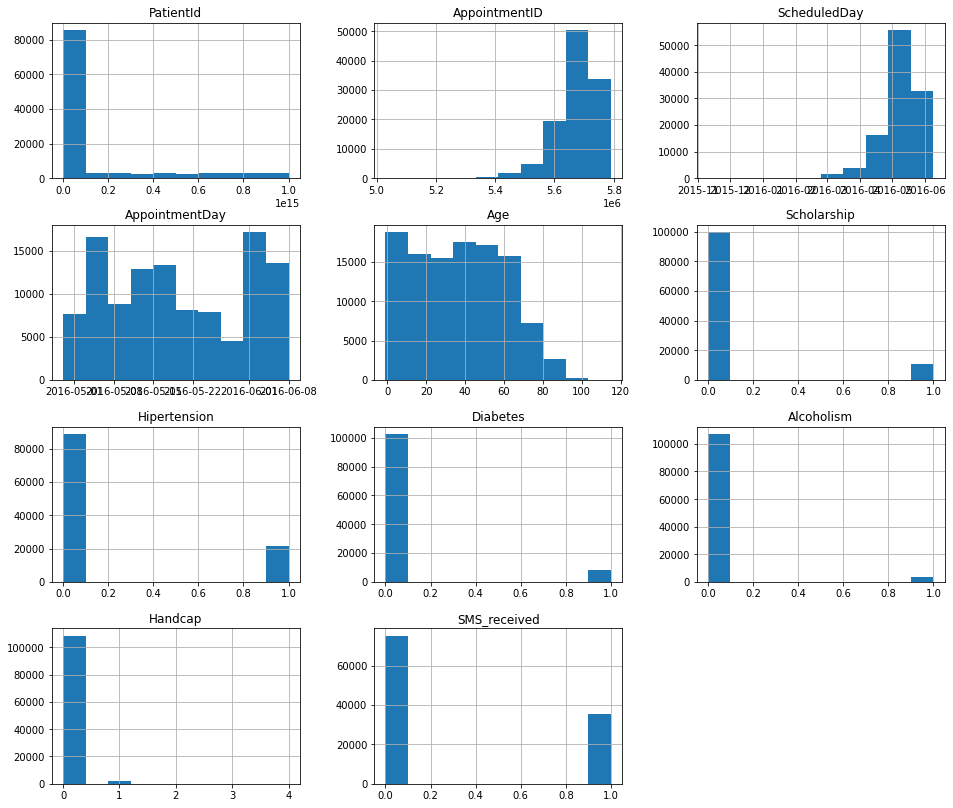

In [ ]:
#Observation de la distribution:
cp3.hist(figsize=(16,14))

# Interpretation:
- Tres peu de patients sont alcooliques: approximativement 4000 patients alcooliques.
- Tres peu de patients sont **diabétiques** bien qu'il y ait un peu plus de diabétiques que d'alcooliques, **approximativement le double des alcooliques**: soit **8000 patients**. Puisque les bières ont une teneur en sucre très élevée, nous sommes tentés de croire que bon nombre des patients atteints de diabète sont alcooliques.
- Approximativement **21000 patients** sont **hypertendus**. 
- Environ **2000 patients** sont atteints d'un **handicape**.
- Environ **36000 patients** ont reçus au moins un **SMS**. Cela nous mène vers le soupçon de conclusion qu'approximativement toutes les personnes atteintes **d'une maladie ou un handicapes** ont reçu au **moins un message**.
- Pres de **90000 fois les patients** se sont presentes au rendez-vous.
- Environ **10000 patients** ont recu une bourse de traitement ou de suivi bresilienne **Bolsa Família.**

In [ ]:
print("Le nombre de patients ayant moin d'un an est: {}.".format(cp3[cp3['Age'] == -1].shape[0]))
print("Le nombre de patients ayant un age nul est {}.".format(cp3[cp3['Age'] == 0].shape[0]))
print("Le nombre de patients ayant l'age de 115 est {}.".format(cp3[cp3['Age'] ==115].shape[0]))
print("Le nombre de patients ayant au moins 100 ans est {}.".format(cp3[cp3['Age'] >= 100].shape[0]))

Le nombre de patients ayant moin d'un an est: 1.
Le nombre de patients ayant un age nul est 3539.
Le nombre de patients ayant l'age de 115 est 5.
Le nombre de patients ayant au moins 100 ans est 11.


In [ ]:
# Retirer tous les patients qui on soit un age null, soit un age negatif.
cp2 = cp3[cp3['Age']>=1]
cp2

,PatientId,AppointmentID,ScheduledDay,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,2016-04-29 18:38:08+00:00,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,2016-04-29 16:08:27+00:00,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,2016-04-29 16:19:04+00:00,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,2016-04-29 17:29:31+00:00,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,2016-04-29 16:07:23+00:00,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,2016-05-03 09:15:35+00:00,F,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,2016-05-03 07:27:33+00:00,F,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,2016-04-27 16:03:52+00:00,F,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,2016-04-27 15:09:23+00:00,F,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
#Observation des donnees agregees
cp2.describe(include='all')

,PatientId,AppointmentID,ScheduledDay,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.069870e+05,1.069870e+05,106987,106987,106987,106987.000000,106987,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987
unique,NaN,NaN,100307,2,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,2016-05-06 07:09:54+00:00,F,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,24,70118,4528,NaN,7586,NaN,NaN,NaN,NaN,NaN,NaN,85307
first,NaN,NaN,2015-11-10 07:13:56+00:00,NaN,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 20:07:23+00:00,NaN,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.472814e+14,5.675434e+06,NaN,NaN,NaN,38.316085,NaN,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,NaN
std,2.558267e+14,7.133274e+04,NaN,NaN,NaN,22.466214,NaN,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,NaN
min,3.921700e+04,5.030230e+06,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.173523e+12,5.640490e+06,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


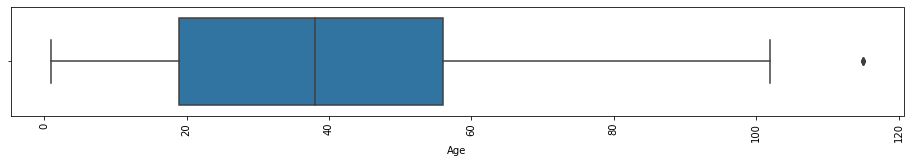

In [ ]:
#Visualiser la distribution de l'age des patients
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=cp2.Age)

# Interpretation:
Les patients sont majoritairement ages de 1 a 102 ans et il y a 5 patients ages de 115 ans pour ce qui est du reste. 

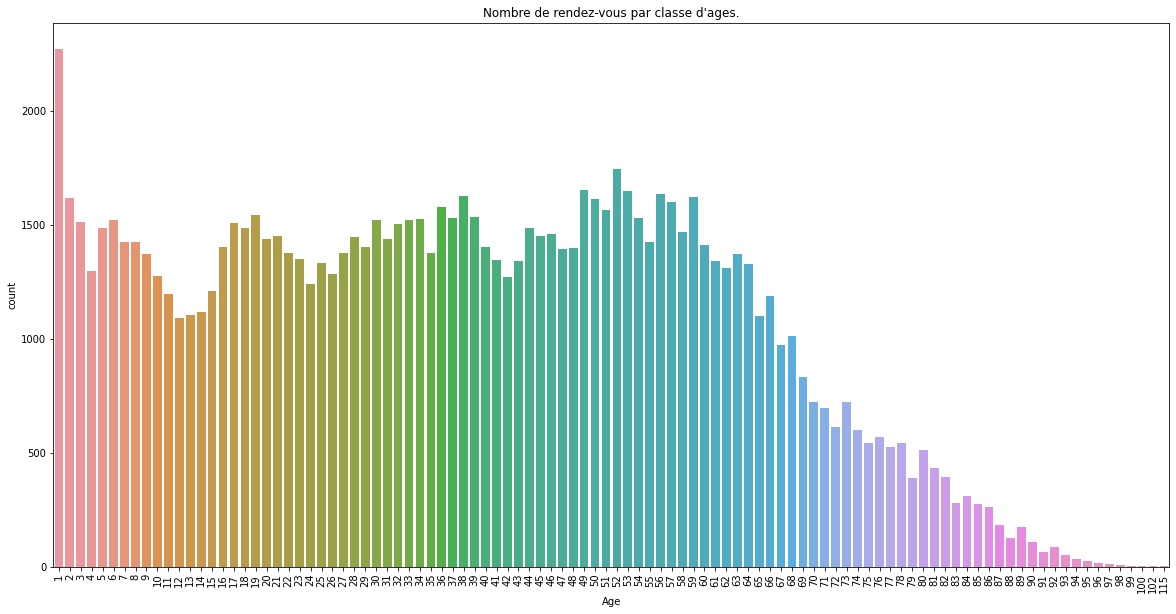

In [ ]:
#Visualisons le nombre de rendez-vous par age:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=cp2.Age)
ax.set_title("Nombre de rendez-vous par classe d'ages.")
plt.show()

### Handicape

In [ ]:
# Afficher les classes uniques des handicapes:
print("Classe Unique des handicapes est:  {}".format(cp2.Handcap.unique()))

Classe Unique des handicapes est:  [0 1 2 3 4]


In [ ]:
# Visualisons le nombre de valeur dans chaque classe de handicape:
cp2.Handcap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64

Le resultat nous permet de conclure qu'il s'agit des differents degres de handicape. 

### Diabetes	

In [ ]:
# Afficher les classes uniques des diabetiques:
print("Classe Unique des diabetiques est: {}".format(cp2.Diabetes.unique()))

Classe Unique des diabetiques est: [0 1]


### SMS_received

In [ ]:
# Afficher les classes uniques des SMS:
print("Classe Unique des SMS est: {}".format(cp2.SMS_received.unique()))

Classe Unique des SMS est: [0 1]


### Alcooliques

In [ ]:
# Afficher les classes uniques des alcooliques:
print("Classe Unique des alcooliques est: {}".format(cp2.Alcoholism.unique()))

Classe Unique des alcooliques est: [0 1]


### Hipertendus

In [ ]:
# Afficher les classes uniques des Hipertendus:
print("Classe Unique des Hipertendus est: {}".format(cp2.Hipertension.unique()))

Classe Unique des Hipertendus est: [1 0]


### Boursiers

In [ ]:
# Afficher les classes uniques des boursiers:
print("Classe Unique des boursiers est: {}".format(cp2.Scholarship.unique()))

Classe Unique des boursiers est: [0 1]


### No-show

In [ ]:
# Afficher les classes uniques des No-show:
print("Classe Unique des No-show est: {}".format(cp2['No-show'].unique()))

Classe Unique des No-show est: ['No' 'Yes']


| **Noms** | **Types** | **Descriptions** |
|----------|-----------|------------------|
|PatientId | Entier | Matricule du Patient|
|AppointmentID|Entier|Identite du rendez-vous|
|Gender |M ou F |Si `F` alors **femme** ou `M` si **Homme**|
| ScheduledDay| date | Jour et heure de la prise du rendez-vous |
| AppointmentDay | date | Jour et heure du rendez-vous|
| Age | Entier | Quel age a le patient |
| Neighbourhood | Entier | Lieu ou Location de l'hopital  |
| Scholarship | Booleen | Dire si oui ou non le patient detient le programme de prise en charge Bresilien **Bolsa Família** |
| Hipertension | Booleen |  Dire si oui ou non le patient a l'hypertension |
| Diabetes | Booleen |  Dire si oui ou non le patient a le diabete  |
| Alcoholism | Booleen |  Dire si oui ou non le patient est alcoolique|
| Handcap | Booleen |  Dire le degre de handicape du patient  |
| SMS_received | Booleen |  Dire si oui ou non le patient a recu un ou plusieurs messages. |
| No-show | Booleen | Dire `No` si le patient s'est presente au rendez-vous et `Yes` s'il ne l'a pas fait |


## Questions Importantes:
1. Quel est le pourcentage de patients qui a manque le rendez-vous de consultation? 
2. Quelle est distribution des patients suivants le genre presentée ou pas à la consultation?
3. Combien de patient ont demande plusieurs rendez-vous?
4. Quelle est la répartition par âge du diabète qui s'est manifesté et qui ne s'est pas présenté ?
5. Comment les activités réalisées par un bureau de prise de rendez-vous (envoi de SMS, participation à une bourse) influencent le ratio show/no-show ?
6. Quels facteurs sont importants à connaître pour prédire si un patient se présentera à son rendez-vous prévu ?

## Analyse exploratoire des donnees.

### Définir des valeurs de style pour toutes nos visualisations

In [ ]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('pastel')[0:5]

## Quel est le pourcentage de patients qui a manque le rendez-vous de consultation?

In [ ]:
cp2['No-show'].nunique()

2

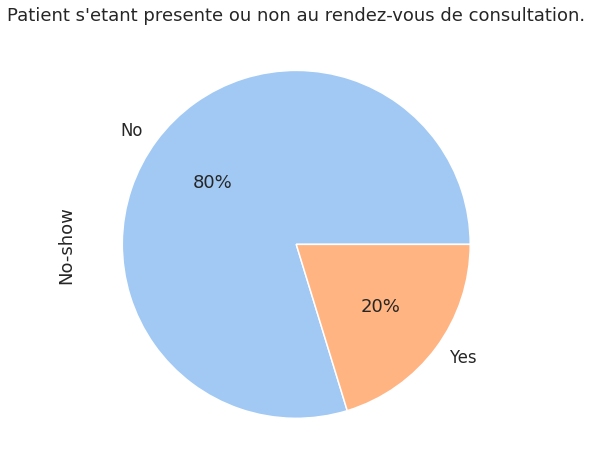

20.26% de patients ont manqué leur rendez-vous de consultation.
79.74% de patients ont été à leur rendez-vous de consultation.


In [ ]:
# Pourcentage de patients ayant manque ou non au rendez-vous de consultation:
plt.figure(figsize=(10,8))
ax = cp2['No-show'].value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
ax.set_title("Patient s'etant presente ou non au rendez-vous de consultation.")
plt.show()

# Confirmer le resultat de facon numerique:
Nombre_rendez_vous = cp2.shape[0]
Rendez_vous_manquer = cp2[cp2['No-show']=='Yes'].shape[0]
ratio = round((Rendez_vous_manquer/Nombre_rendez_vous)*100, 2)
print('{}% de patients ont manqué leur rendez-vous de consultation.'.format(ratio))
print('{}% de patients ont été à leur rendez-vous de consultation.'.format(100 - ratio))

## Quelle est distribution des patients suivants le genre presentée ou pas à la consultation?

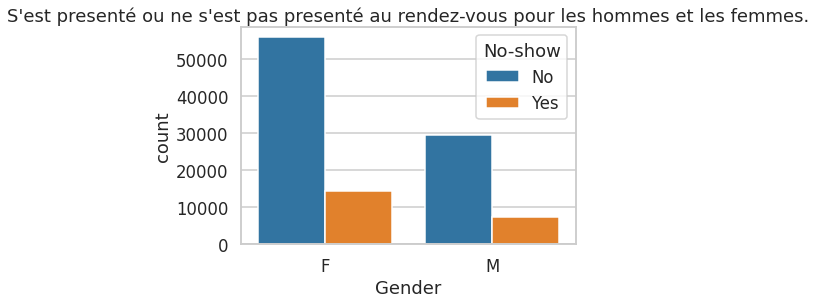

Sur 70118 rendez-vous pris par les femmes, 14275 ont été manqués avec un ratio de 20.36%.
Sur 36869 rendez-vous pris par les hommes, 7405 ont été manqués avec un ratio de 20.08%.
Sur 70118 rendez-vous pris par les femmes, 14275 ont été presentés avec un ratio de 79.64%.
Sur 36869 rendez-vous pris par les hommes, 7405 ont été presentés avec un ratio de 79.92%.


In [ ]:
#Extraction des données suivant le genre:
rendez_vous_f = cp2[cp2['Gender'] == "F"]
rendez_vous_m = cp2[cp2['Gender'] == "M"]

#Nombre de données extraites suivant le genre:
Nombre_rendez_vous_f = rendez_vous_f.shape[0]
Nombre_rendez_vous_m = rendez_vous_m.shape[0]

#Nombre de rendez-vous manque extraites suivant le genre:
Rendez_vous_manquer_f = rendez_vous_f[rendez_vous_f['No-show']=='Yes'].shape[0]
Rendez_vous_manquer_m = rendez_vous_m[rendez_vous_m['No-show']=='Yes'].shape[0]

#Ratio des rendez-vous manque extraites suivant le genre:
ratio_f = round((Rendez_vous_manquer_f/Nombre_rendez_vous_f)*100, 2)
ratio_m = round((Rendez_vous_manquer_m/Nombre_rendez_vous_m)*100, 2)

# Visualisation sur un diagramme a bar:
ax = sns.countplot(x=cp2.Gender, hue=cp2['No-show'], data=cp2)
ax.set_title("S'est presenté ou ne s'est pas presenté au rendez-vous pour les hommes et les femmes.")
x_ticks_labels=['Femme', 'Homme']
plt.show();

# Affichage de rapport chiffres:
print('Sur {} rendez-vous pris par les femmes, {} ont été manqués avec un ratio de {}%.'.format(Nombre_rendez_vous_f, Rendez_vous_manquer_f, ratio_f))
print('Sur {} rendez-vous pris par les hommes, {} ont été manqués avec un ratio de {}%.'.format(Nombre_rendez_vous_m, Rendez_vous_manquer_m, ratio_m))
print('Sur {} rendez-vous pris par les femmes, {} ont été presentés avec un ratio de {}%.'.format(Nombre_rendez_vous_f, Rendez_vous_manquer_f, 100 -ratio_f))
print('Sur {} rendez-vous pris par les hommes, {} ont été presentés avec un ratio de {}%.'.format(Nombre_rendez_vous_m, Rendez_vous_manquer_m, 100 -ratio_m))


## Combien de patient ont demande plusieurs rendez-vous?

In [ ]:
#Retrouvons le nombre de patients ayant eu plusieurs rendez-vous:
nbre = cp2.shape[0] - (cp2['PatientId'].unique()).shape[0]
print("Le nombre de patient ayant pris plusieurs rendez-vous est {}".format(nbre))

Le nombre de patient ayant pris plusieurs rendez-vous est 46717


In [ ]:
#Extraire les lignes ayant des patients ayant le top 20 du nombre de rendez-vous:
rdv = cp2['PatientId'].value_counts().iloc[0:10]
rdv

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
75797461494159     62
871374938638855    62
6264198675331      62
66844879846766     57
872278549442       55
Name: PatientId, dtype: int64

In [ ]:
# Duree de tous les rendez-vous.
duree= pd.to_datetime(cp2['AppointmentDay']).dt.date.max() - pd.to_datetime(cp2['AppointmentDay']).dt.date.min()
print("Les rendez-vous s'etendent sur une duree de {} jours.".format(duree.days))

Les rendez-vous s'etendent sur une duree de 40 jours.


Certains patients ont plusieurs rendez-vous. Les patients ayant le top 20 du nombre de rendez-vous varient entre **88 à 55 occurences**. Si l'on tient compte du fait que la durée des visites s'étend sur un mois et demi environ, un rendez-vous correspond très probablement à un examen, une consultation ou à une visite chez un spécialiste. Ainsi, lors d'une seule visite d'un patient dans un hôpital, plusieurs rendez-vous peuvent être programmés. L'une des raisons pour lesquelles les patients ne se présentent pas peut être le fait qu'ils sont trop fatigués pour participer à tous les examens lors d'une visite particulière, ou que les heures d'ouverture ne sont pas suffisantes pour se présenter à tous les rendez-vous. Il peut également y avoir d'autres raisons. 



## Quelle est la répartition par âge du diabète qui s'est manifesté et qui ne s'est pas présenté ?

In [ ]:
# Convertir les valeurs booleennes en numeriques (Yes->1, No->0):
cp2['No-show_num'] = np.where(cp2['No-show']=='Yes', 1, 0)

# Grouper suivant la manifestation ou non du diabete
cp2[['Diabetes', 'No-show_num']].groupby('Diabetes').mean().sort_values(by='No-show_num')

,No-show_num
Diabetes,
1,0.180033
0,0.204455


En général, **18% des diabétiques** ne se sont pas présentés, ce qui représente une baisse d'environ **2%** par rapport à la moyenne générale des non-diabetiques qui ne sont presentes. Il semble que les diabétiques soient plus attentifs à leur santé et prennent leurs rendez-vous médicaux plus au sérieux que les non-diabétiques.

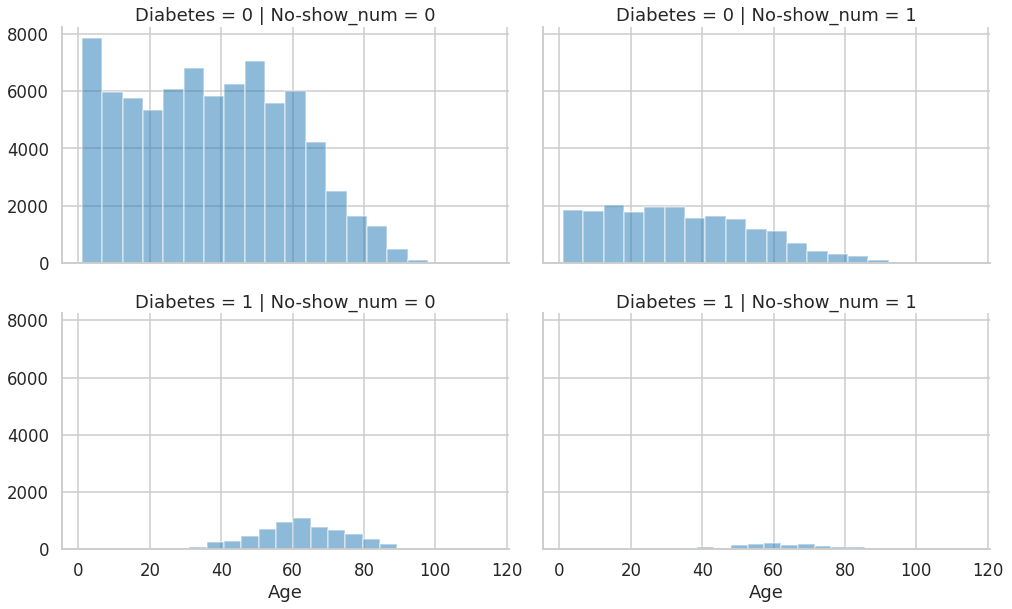

In [ ]:
grid = sns.FacetGrid(cp2, col='No-show_num', row='Diabetes', height=4.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### La forme de la distribution du diabète est symétrique. La moyenne de cette distribution est d'environ 60. Pour la calculer plus précisément, ainsi que son écart-type, il faut utiliser une méthode statistique.

## Comment les activités réalisées par un bureau de prise de rendez-vous (envoi de SMS, participation à une bourse) influencent le ratio show/no-show ?

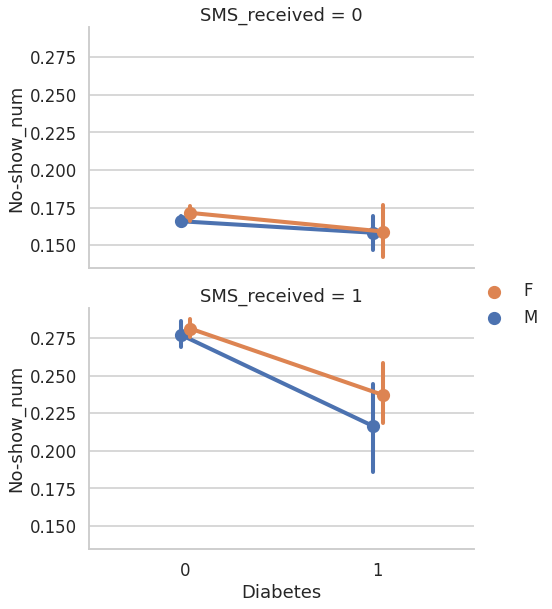

In [ ]:
# Le Pointplot utilise la méthode du bootstraping pour estimer une moyenne et une erreur-type.
# Rendez-vous liés aux patients diabétiques et recevant des SMS
grid = sns.FacetGrid(cp2, row='SMS_received', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'Diabetes', 'No-show_num', 'Gender', palette='deep', dodge=True)
grid.add_legend();

On pourrait (et cela sera contre intuitif à la fois) de dire que les patients diabétiques se présentent tres faiblement s'ils reçoivent des SMS. Malheureusement, l'erreur standard pour le diabète est trop élevée, ce qui réduit notre confiance dans le résultat présenté dans le diagramme ci-dessus.

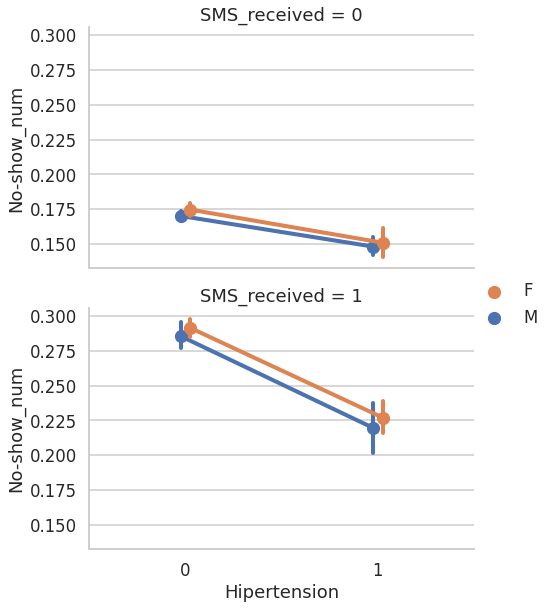

In [ ]:
# Rendez-vous liés aux patients souffrant d'hypertension et recevant des SMS :
grid = sns.FacetGrid(cp2, row='SMS_received', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'Hipertension', 'No-show_num', 'Gender', palette='deep', dodge=True)
grid.add_legend();

Parmi les rendez-vous pris par des patients souffrant d'hypertension, il semble que l'envoi de SMS entraîne un taux plus élevé d'absences (22-24 % contre 16 %). Un autre élément surprenant nous apprend que le taux de non-présentation des hommes est inférieur à celui des femmes. Normalement, je dirais le contraire. Dans les deux cas (que le SMS soit envoyé ou non), le taux de non-présentation des patients souffrant d'hypertension est inférieur à celui des patients sans hypertension.


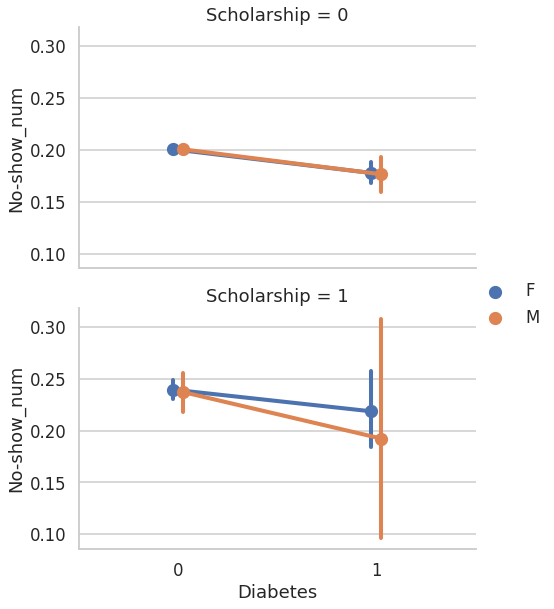

In [ ]:
# Rendez-vous liés aux patients atteints de diabète et à la participation aux bourses de santes :
grid = sns.FacetGrid(cp2, row='Scholarship', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'Diabetes', 'No-show_num', 'Gender', palette='deep', dodge=True)
grid.add_legend();

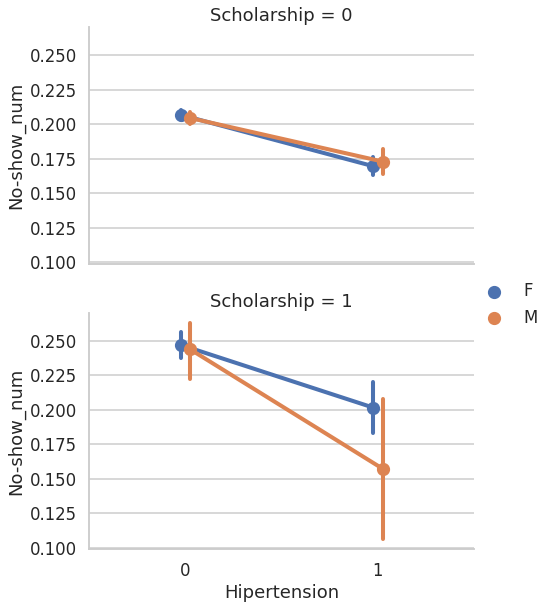

In [ ]:
# Rendez-vous liés aux patients atteints de Hipertension et à la participation aux bourses de santes :
grid = sns.FacetGrid(cp2, row='Scholarship', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'Hipertension', 'No-show_num', 'Gender', palette='deep', dodge=True)
grid.add_legend();

## Quels facteurs sont importants à connaître pour prédire si un patient se présentera à son rendez-vous prévu ?

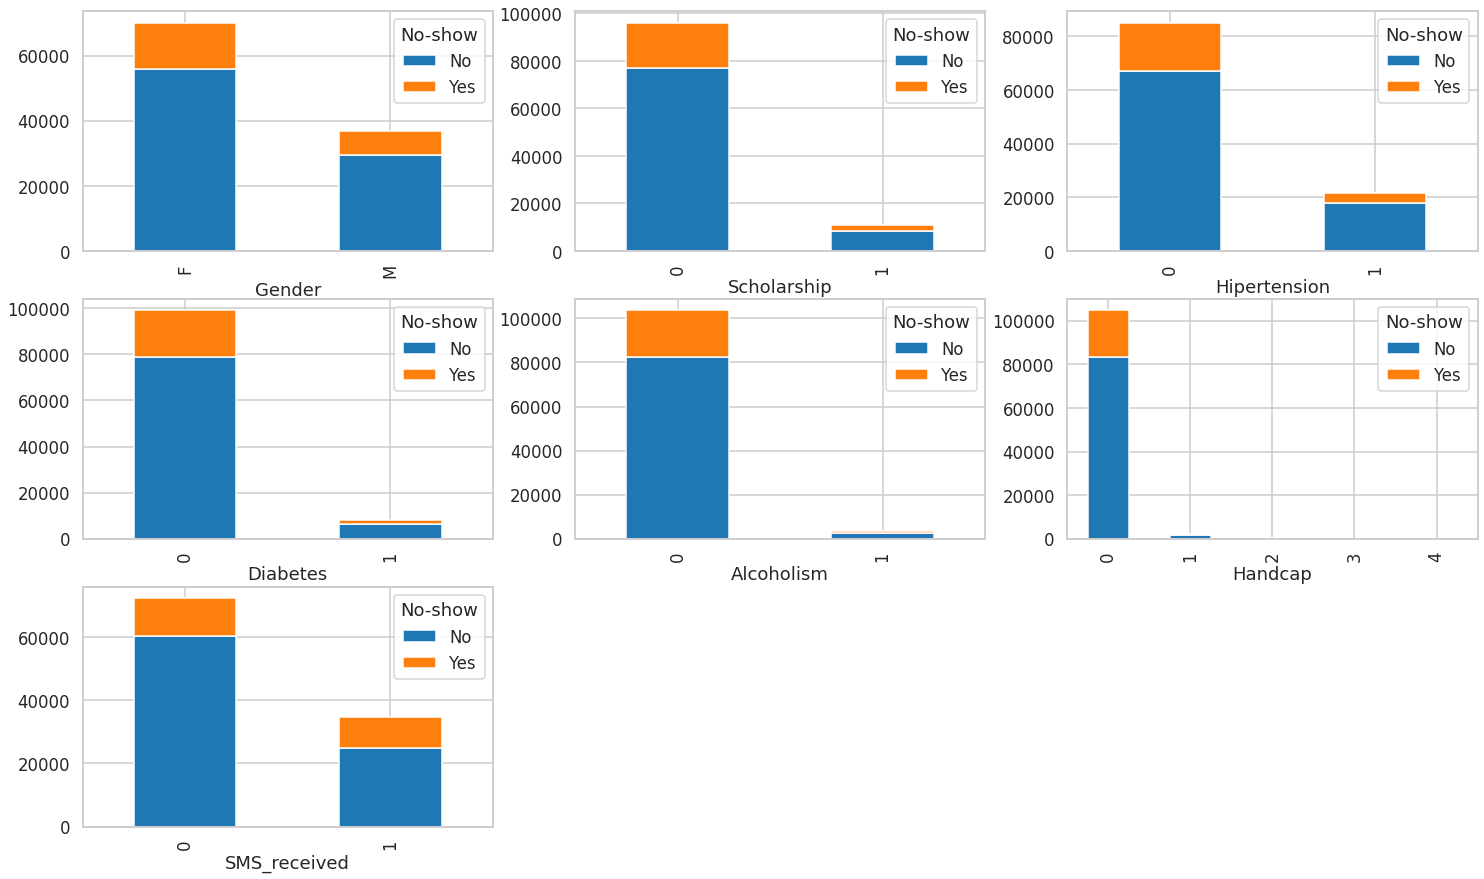

In [ ]:
# First, let's look at categorical variables
Variable_categorielle = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

fig = plt.figure(figsize=(25, 15))
for i, var in enumerate(Variable_categorielle):
    ax = fig.add_subplot(3, 3, i+1)
    cp2.groupby([var, 'No-show'])[var].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

 Les graphiques confirment un pourcentage des patients absents au rendez-vous semble être supérieur à 20% pour la plupart des catégories.



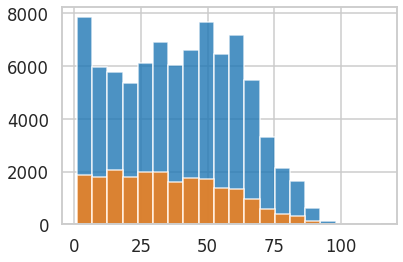

In [ ]:
# Visualisons maintenant de plus près les variables numériques Age :
cp2.Age[cp2['No-show'] == 'No'].hist(alpha=0.8, bins=20);
cp2.Age[cp2['No-show'] == 'Yes'].hist(alpha=0.8, bins=20);

Les nourrissons se présentent le plus souvent, puis les personnes âgées de 50 à 55 ans. Mais entre 1 - 65 ans, le pourcentage des patients absents au rendez-vous semble être supérieur à 20%.

# Conclusion:
Pour mener a bien cette etude, nous avons géré des problèmes de types de données, supprimé des données erronées, l'ajout de nouvelles caractéristiques basées sur les données existantes.
 Nous avons également examiné la plupart des variables indépendantes de l'ensemble de données et fait quelques observations en les comparant les unes aux autres ainsi qu'à la variable dépendante (No-show). Comme il ne s'agissait que d'une analyse exploratoire, de nombreuses corrélations potentielles peuvent rester non découvertes. Les données devraient être étudiées plus en profondeur à l'aide d'une analyse statistique plus avancée afin de révéler de nouvelles perspectives et corrélations.

Les Observations les plus importantes sont les suivants :
- Les dates de reservations sont comprises entre le **10 Novembre 2015** et **08 Juin 2016**. La date de reservations la plus frequente est le **06 Mai 2016** qui apparait **24** fois.
- Les rendez-vous sont pris entre la date du **29 Avril 2016**  au **08 Juin 2016**. La date de rendez-vous la plus frequente est le **06 Juin 2016** qui apparait **4692** fois.	 
- Le quartier dans lequel il y a plus de rendez-vous pour consultation est **JARDIM CAMBURI** avec **7717** occurences.
- L'**age moyen** des patients est **37 ans**. **25%** des patients ont moins de **18 ans** avec le patient le plus jeunes a**-1 an** ce qui n'est pas possible car un homme ne peut avoir un age negatif. Le plus viens a **115 ans**.
- Tres peu de patients sont alcooliques: approximativement 4000 patients alcooliques.
- Tres peu de patients sont **diabétiques** bien qu'il y ait un peu plus de diabétiques que d'alcooliques, **approximativement le double des alcooliques**: soit **8000 patients**. Puisque les bières ont une teneur en sucre très élevée, nous sommes tentés de croire que bon nombre des patients atteints de diabète sont alcooliques.
- Approximativement **21000 patients** sont **hypertendus**. 
- Environ **2000 patients** sont atteints d'un **handicape**.
- Environ **36000 patients** ont reçus au moins un **SMS**. Cela nous mène vers le soupçon de conclusion qu'approximativement toutes les personnes atteintes **d'une maladie ou un handicapes** ont reçu au **moins un message**.
- Pres de **90000 fois les patients** se sont presentes au rendez-vous.
- Environ **10000 patients** ont recu une bourse de traitement ou de suivi bresilienne **Bolsa Família.**
- En moyenne, les patients ont attendu 10 jours pour obtenir un rendez-vous. 50% des patients ont attendu jusqu'à 4 jours et 75% jusqu'à 15 jours pour un rendez-vous. Le temps d'attente le plus long a été de 179 jours.
- Près de 40 000 patients ont programmé leur visite le jour même.
Sur l'ensemble des patients ayant pris un rendez-vous le jour même (38561 au total), 1792 patients ne se sont pas présentés (5%).

- Il y a beaucoup de personnes très jeunes dans l'ensemble de données (la plupart d'entre elles sont âgées de 0 an), mais en général, l'âge des patients est réparti de manière égale et le nombre de patients diminue de manière drastique pour les patients âgés de plus de 60 ans.

- Les patients ont 37 ans en moyenne. 25% des patients ont moins de 18 ans et la plupart d'entre eux ont moins de 55 ans.

# Recommendations
Les absences des patients au rendez-vous pourrait perturber le système de prise en charge des soins de santé en créant des inefficacités et en empêchant l'utilisation de ressources précieuses. L'identification de tous les facteurs possibles sous-jacents aux absences avec des stratégies d'atténuation appropriées, par exemple des systèmes de planification dynamique avec l'utilisation d'outils d'analyse prédictive via l'apprentissage automatique et l'intelligence artificielle, peut aider les organisations de soins de santé à réduire et à absorber l'impact des absences. Tout ceci data le but de rendre plus efficaces et efficients les soins de santé. Par ailleurs, de telles approches permettraient de mieux faire correspondre l'offre à la demande attendue dans de telles circonstances. Les recommandations ci-dessous pour le processus de planification peuvent également être utiles dans le but de réduire les taux de non-présentation :
- Ajout de rappels automatisés pour ajuster les comportements des patients (par exemple, SMS, appels téléphoniques, e-mails) permettrait de reduire de maniere considerable les absences aux rendez-vous de soin sanitaire. 
- Établir une ligne téléphonique d'annulation séparée et utiliser un langage de communication intelligent dans les rappels d'appels téléphoniques, pour donner au patient le confort et le courage d'annuler les rendez-vous réservés s'ils ne sont plus nécessaires.
- En utilisant les dossiers de santé électroniques (DSE), les prestataires de soins de santé peuvent accéder à l'historique des absences au rendez-vous des patients et créer des modèles prédictifs capables d'évaluer chaque patient et sa probabilité d'absence au rendez-vous. En tenant compte du dossier de electroniques de rendez-vous (tenant compte des absences) des patients et de leur probabilité de manquer leur rendez-vous, des outils et des méthodes d'analyse prédictive peuvent être utilisés pour créer des conditions de surréservation. 
- L'industrie de la santé pourrait envisager d'adopter cette pratique en appliquant des sanctions financières ou des incitations lorsque les patients manquent ou assistent à leurs rendez-vous. De plus, les prestataires de soins de santé peuvent adopter une politique de congé pour les patients qui ne se présentent pas à plusieurs reprises afin de forcer les patients à développer un bon sens des responsabilités.
- Afin de réduire l'anxiété et la peur chez les patients subissant tout type d'examen (en particulier une IRM), il est crucial de développer des stratégies, telles que la fourniture d'informations détaillées aux patients, l'utilisation d'outils audiovisuels et de protocoles de réduction de l'anxiété. Ces stratégies, en plus de fournir aux prestataires de soins de santé une formation adéquate, peuvent permettre aux patients de mieux connaître leur état de santé et de se préparer mentalement à se rendre à leur rendez-vous sans inquiétude ni peur inutiles.

Les observations et les recommandations de cette étude peuvent être utilisés pour examiner différents facteurs d'absences aux rendez-vous et leurs impacts potentiels dans une étude de cas particulière où la peur et l'anxiété sont potentiellement des moteurs pour des taux élevés d'absences aux rendez-vous. Bien que les résultats de cette étude fournissent des informations importantes, les études futures pourraient bénéficier d'études qualitatives et quantitatives plus structurées pour mieux classer l'importance des facteurs en tant que facteurs d'absences des patients.